<a href="https://colab.research.google.com/github/cairoegito/Estudo-da-Depressao-nos-EUA/blob/main/depressaonosEUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Importando todas as bibliotecas 
import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.express as plx
import matplotlib.pyplot as plt
dados= pd.read_csv("/content/drive/MyDrive/depressaonosEUA/PAG_HEI.csv")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dados.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [6]:
dados.isnull().sum()
#Existem muitos dados faltantes, por isso mantê-los pode prejudicar nossa análise. Optarei por destruir os mesmos

SEQN                           0
PAG_MINW                    2274
ADHERENCE                   2274
HEI2015C1_TOTALVEG           875
HEI2015C2_GREEN_AND_BEAN     875
HEI2015C3_TOTALFRUIT         875
HEI2015C4_WHOLEFRUIT         875
HEI2015C5_WHOLEGRAIN         875
HEI2015C6_TOTALDAIRY         875
HEI2015C7_TOTPROT            875
HEI2015C8_SEAPLANT_PROT      875
HEI2015C9_FATTYACID          875
HEI2015C10_SODIUM            875
HEI2015C11_REFINEDGRAIN      875
HEI2015C12_SFAT              875
HEI2015C13_ADDSUG            875
HEI2015_TOTAL_SCORE          875
dtype: int64

In [7]:
#Limpando utilizando a função dropna
dados2= dados.dropna()
dados2.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
1,31129,285.450346,2.0,1.697761,0.000000,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
3,31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
5,31133,0.000000,1.0,1.417400,0.000000,2.083333,1.317204,0.000000,3.176179,3.617204,0.470430,5.657701,5.589008,0.000000,6.473871,5.779322,35.581653
6,31134,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826


In [8]:
dados2.shape

(6579, 17)

In [9]:
#Vamos observar quantos pacientes dedicam-se o tempo mínimo aos esportes na semana
dados2[dados2["PAG_MINW"] >= 30]
#Temos que 1311 pessoas não fazem o tempo mínimo de atividades esportivas semanais e 5268 fazem

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
1,31129,285.450346,2.0,1.697761,0.000000,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
3,31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
6,31134,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
8,31137,1423.787529,3.0,1.516093,0.000000,0.828672,0.000000,0.676749,5.000000,3.526000,0.000000,4.379950,8.192344,7.032194,5.461700,0.000000,36.613702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9417,41467,301.709007,3.0,3.458885,0.000000,3.349961,4.254695,0.000000,5.000000,5.000000,0.000000,6.098940,0.476004,0.000000,7.513204,9.693030,44.844719
9418,41468,173.210162,2.0,5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869
9419,41469,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
9420,41471,951.478060,3.0,2.674192,3.769401,2.198817,0.517369,0.463168,4.662005,5.000000,1.191796,6.145146,3.189620,3.766149,3.974279,7.758940,45.310883


In [10]:
# A OMS também indica ingestão semanal maior que 5 frutas, vamos ver quantos pacientes cumprem isso
dados2[dados2["HEI2015C3_TOTALFRUIT"] == 5]
# Apenas 1566 pacientes dentre 6579

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
3,31131,264.711316,2.0,3.115103,0.000000,5.0,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.000000,5.0,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
14,31143,3768.083141,3.0,2.867000,0.389880,5.0,5.000000,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131
21,31150,1254.041570,3.0,2.499002,0.000000,5.0,5.000000,5.000000,5.000000,4.093324,0.000000,7.660037,9.368343,9.253592,10.000000,8.797673,71.671972
24,31153,504.618938,3.0,3.452428,5.000000,5.0,5.000000,0.521249,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,9.507001,8.036070,81.516748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9401,41449,415.704388,3.0,0.577640,0.000000,5.0,5.000000,1.646680,5.000000,4.016467,0.000000,0.000000,7.863493,5.773474,0.000000,6.439675,41.317428
9402,41450,584.272517,3.0,1.200441,3.568879,5.0,5.000000,5.000000,5.000000,4.514632,4.037295,1.037067,8.022048,10.000000,6.620450,4.579147,63.579959
9403,41451,41.570439,1.0,5.000000,0.000000,5.0,5.000000,3.846599,4.277960,5.000000,4.475148,3.852128,3.661221,10.000000,5.903285,4.865824,60.882166
9416,41466,9.237875,1.0,2.885575,1.260753,5.0,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915


In [11]:
dados3= pd.read_csv("/content/drive/MyDrive/depressaonosEUA/DEMO_PHQ.csv")

In [12]:
dados4= dados3.dropna()
dados4.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0


In [13]:
dados4.shape

(4800, 15)

In [14]:
#Combinando os dois dataframes tratados
dados5 = pd.merge(dados2, dados4, on="SEQN")
dados5.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,...,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,...,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
1,31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,...,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
2,31134,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,...,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
3,31139,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,...,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
4,31143,3768.083141,3.0,2.867000,0.389880,5.000000,5.000000,1.444002,5.000000,3.372033,...,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0


In [15]:
dados5.shape

(4702, 31)

In [16]:
#Criando nova coluna para análise da combinação de sintomas da depressão
dados5["phq9"] = dados5["DPQ010"] + dados5["DPQ020"] + dados5["DPQ030"] + dados5["DPQ040"] + dados5["DPQ050"] + dados5["DPQ060"] + dados5["DPQ070"] + dados5["DPQ080"] + dados5["DPQ090"]
phq9 = dados5["phq9"]
phq9.head()

0    0.0
1    0.0
2    0.0
3    4.0
4    6.0
Name: phq9, dtype: float64

In [17]:
# Condições para analisar a gravidade da possível depressão
dados5['phq_grp'] = np.where(dados5['phq9']<3, 'Sem Sintomas',
                    np.where(dados5["phq9"]<5, "Sintomas Leves",
                   np.where(dados5['phq9']<12, 'Sintomas Moderados',
                   np.where(dados5['phq9']<15, 'Sintomas Graves', 
                   np.where(dados5['phq9']<25, 'Sintomas Gravíssimos',  "value6")))))

dados5['phq_grp'].value_counts()

Sem Sintomas            3041
Sintomas Moderados       780
Sintomas Leves           665
Sintomas Graves          105
Sintomas Gravíssimos     100
value6                    11
Name: phq_grp, dtype: int64

In [20]:
#Analise Univariada da atividade física
grafico = plx.box(dados2, y="PAG_MINW")
grafico.show()

In [ ]:
#Analise bivariada com phq9 com as características demográficas
    #Vamos analisar a relação da escolaridade com "se sentir para baixo e/ou deprimido"
escolaridade = dados4[dados4["DMDEDUC"] == 4].head(800)
sentimento = dados4[dados4["DPQ020"] != 0].head(800)
plt.bar(dados4["DMDEDUC"] == 4, dados4["DPQ020"] != 0, color="blue")
plt.xlabel("Superior Completo")
plt.ylabel("Deprimido 1x na semana")
plt.scatter(escolaridade,sentimento)

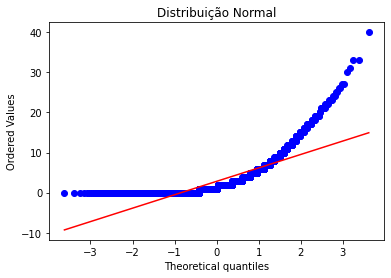

In [24]:
#VAMOS ANALISAR A NORMALIDADE DA VARIÁVEL DOS SINTOMAS DA DEPRESSÃO
stats.probplot(dados5["phq9"], dist="norm", plot=plt)
plt.title("Distribuição Normal")
plt.show()
#Notemos que os valores tem uma certa normalidade central e depois um crescimento aproximadamente exponencial

In [25]:
#TESTE SHAPIRO-WILK
stats.shapiro(dados5.phq9)
#Notemos pelo valor que com nível de significância de 5% como base. Quando p > 0,05 temos uma distribuição normal

ShapiroResult(statistic=0.7108970880508423, pvalue=0.0)